<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Coding Embedded</font></h2> 

In [1]:
from ipy_oxdna.oxdna_simulation import SimulationManager, Simulation, Observable
from ipy_oxdna.generate_replicas import ReplicaGroup
import oxpy
import os
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import scipy.stats as stats

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
path = os.path.abspath('/scratch/matthew/project_files/dnaOrigami/e3/dataset/generate_trajectories/nanobase_data')

systems = [file_dir for file_dir in os.listdir(path) if os.path.isdir(f'{path}/{file_dir}')]

file_dir_list = [f'{path}/{system_name}' for system_name in systems]
sim_dir_list = [f'{path}/{system_name}/0_relax'  for system_name in systems]


n_replicas = 3
replica_generator = ReplicaGroup()

replica_info = [(systemname, file_dir, sim_dir) for systemname, file_dir, sim_dir in zip(systems, file_dir_list, sim_dir_list)]

replica_generator.multisystem_replica(
    replica_info,
    n_replicas, 
)

relax_sim_list = replica_generator.sim_list


relax_parameters_list = [
    {
    'max_backbone_force': '50',
    'max_backbone_force_far': '100',
    'steps': '5e2'
    } for _ in range(len(relax_sim_list))
]

In [4]:
relax_sim_manager = SimulationManager(sleep_time=0.25)

for idx, sim in enumerate(relax_sim_list):
    sim.build(clean_build='force')
    sim.input.swap_default_input('cpu_MC_relax')
    sim.input_file(relax_parameters_list[idx])
    sim.make_sequence_dependant()
    relax_sim_manager.queue_sim(sim)

In [ ]:
relax_sim_manager.run(cpu_run=True)

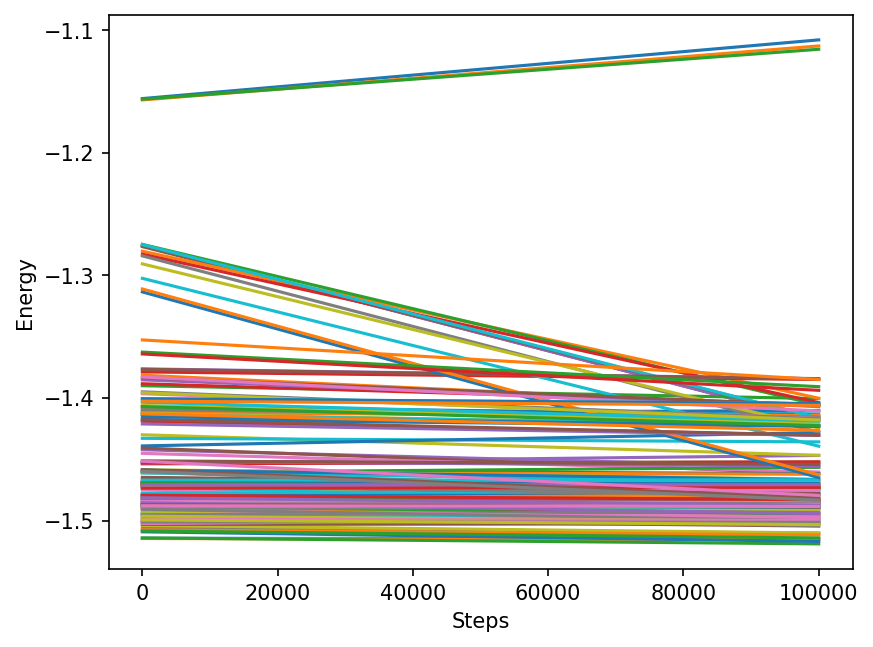

In [7]:
import pandas as pd
fig, ax = plt.subplots(dpi=150)

energies = []
for sim in eq_sim_list:
    try:
        sim.sim_files.parse_current_files()
        label = ' '.join(sim.sim_dir.as_posix().split('/')[-3:-1]).replace('_', ' ').replace('simulation files', '').replace('012', '0.12').replace('M', ' M')
        sim.analysis.plot_energy(fig=fig, ax=ax, label=label)

        energies.append(pd.read_csv(sim.sim_files.energy, sep='\\s+', names=['time', 'U', 'P', 'K']))
    except:
        pass
# ax.set_ylim(-1.6, -1.1)    
# plt.legend(fontsize=4)

In [3]:
path = os.path.abspath('/scratch/matthew/project_files/dnaOrigami/e3/dataset/generate_trajectories/nanobase_data')

systems = [file_dir for file_dir in os.listdir(path) if os.path.isdir(f'{path}/{file_dir}')]

file_dir_list = [sim.sim_dir for sim in relax_sim_list]
sim_dir_list = [f'{sim.file_dir}/1_relax/{sim.sim_dir.name}' for sim in relax_sim_list]

relax_1_sim_list = [Simulation(file_dir, sim_dir) for file_dir, sim_dir in zip(file_dir_list, sim_dir_list)]

relax_parameters_list = [
    {
    'max_backbone_force': '50000',
    'max_backbone_force_far': '100000',
    'steps': '5e2'
    } for _ in range(len(relax_1_sim_list))
]

In [19]:
relax_sim_manager = SimulationManager(sleep_time=0.25)

for idx, sim in enumerate(relax_1_sim_list):
    sim.build(clean_build='force')
    sim.input.swap_default_input('cpu_MC_relax')
    sim.input_file(relax_parameters_list[idx])
    sim.make_sequence_dependant()
    relax_sim_manager.queue_sim(sim)

In [ ]:
relax_sim_manager.run(cpu_run=True)

In [4]:
path = os.path.abspath('/scratch/matthew/project_files/dnaOrigami/e3/dataset/generate_trajectories/nanobase_data')

systems = [file_dir for file_dir in os.listdir(path) if os.path.isdir(f'{path}/{file_dir}')]

file_dir_list = [sim.sim_dir for sim in relax_1_sim_list]
sim_dir_list = [f'{sim.sim_dir.parent.parent}/0_eq/{sim.sim_dir.name}' for sim in relax_1_sim_list]

eq_sim_list = [Simulation(file_dir, sim_dir) for file_dir, sim_dir in zip(file_dir_list, sim_dir_list)]

eq_parameters_list = [
    {
    'interaction_type':'DNA2',
    'T':'25C',
    'salt_concentration':'1',
    'steps':f'1e8',
    'print_energy_every': f'5e5',
    'print_conf_interval':f'5e5',
    "dt": "0.003",
    "max_density_multiplier":'10',
    'max_backbone_force': '50',
    'max_backbone_force_far': '100',
    } for _ in range(len(eq_sim_list))
]

In [ ]:
eq_sim_manager = SimulationManager(sleep_time=0.5)

for idx, sim in enumerate(eq_sim_list):
    sim.build(clean_build='force')
    sim.input.swap_default_input('cuda_MD')
    sim.input_file(eq_parameters_list[idx])
    sim.make_sequence_dependant()
    eq_sim_manager.queue_sim(sim)

In [ ]:
eq_sim_manager.run()

In [ ]:
eq_sim_list

In [12]:
for sim in eq_sim_list[::3]:
    sim.analysis.view_last()

In [5]:
path = os.path.abspath('/scratch/matthew/project_files/dnaOrigami/e3/dataset/generate_trajectories')

systems = ['1_hairpin']

file_dir_list = [sim.sim_dir for sim in eq_sim_list]
sim_dir_list = [f'{sim.file_dir}/0_prod/{sim.sim_dir.name}' for sim in eq_sim_list]

prod_sim_list = [Simulation(file_dir, sim_dir) for file_dir, sim_dir in zip(file_dir_list, sim_dir_list)]

prod_parameters_list = [
    {
    'interaction_type':'DNA2',
    'T':'25C',
    'salt_concentration':'1',
    'steps':f'1e5',
    'print_energy_every': f'1e2',
    'print_conf_interval':f'1e2',
    "dt": "0.003",
    
    } for _ in range(len(prod_sim_list))
]

In [13]:
prod_sim_manager = SimulationManager()

for idx, sim in enumerate(prod_sim_list):
    sim.build(clean_build='force')
    sim.input.swap_default_input('cpu_MD')
    sim.input_file(prod_parameters_list[idx])
    sim.make_sequence_dependant()
    prod_sim_manager.queue_sim(sim)

In [ ]:
prod_sim_manager.run(cpu_run=True)

In [34]:
prod_sim_manager.terminate_all()

In [ ]:
fig, ax = plt.subplots(dpi=150)
for sim in prod_sim_list:
    label = ' '.join(sim.sim_dir.as_posix().split('/')[-3:-1]).replace('_', ' ').replace('simulation files', '').replace('012', '0.12').replace('M', ' M')
    sim.analysis.plot_energy(fig=fig, ax=ax, label=label)
    
# plt.legend(fontsize=4)

In [ ]:
for idx, sim in enumerate(prod_sim_list):
    label = ' '.join(sim.sim_dir.as_posix().split('/')[-3:-1]).replace('_', ' ').replace('simulation files', '')
    print(label)
    sim.analysis.view_last()

In [ ]:
def compute_all_energies(sim):
    energies = []
    os.chdir(sim.sim_dir)
    with oxpy.Context():
        
        def compute_single_conf_energies():
            n_particles = backend.config_info().N()
            e_txt = backend.config_info().get_observable_by_id("my_obs").get_output_string(backend.config_info().current_step).strip().split('\n')
            names = ['backbone', 'bonded_excluded_volume', 'stacking', 'nonbonded_excluded_volume', 'hydrogen_bonding',
                              'cross_stacking', 'coaxial_stacking', 'debye_huckel', 'total']
            energies = np.zeros((n_particles, len(names)))
            for e in e_txt:
                if not e[0] == '#':
                    energy = e.split(' ')
                    p_0_idx = int(energy[0])
                    p_1_idx = int(energy[1])
                    l = np.array(list(map(float, energy[2:])))
                    
                    energies[p_0_idx] += l
                    energies[p_1_idx] += l
                    
            return energies
        
        inp = oxpy.InputFile()
        inp["analysis_data_output_1"] = '{ \n name = stdout \n print_every = 1e10 \n col_1 = { \n id = my_obs \n type = pair_energy \n } \n }'
        inp.init_from_filename(sim.sim_files.input.as_posix())
        backend = oxpy.analysis.AnalysisBackend(inp)


        while backend.read_next_configuration():        
            energies.append(compute_single_conf_energies())
        del backend    
        
    return np.array(energies)

my_energies = []
for sim in prod_sim_list:
    my_energies.append(compute_all_energies(sim))


In [ ]:
my_energies[0].shape